In [19]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

#Get training data set 
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

#normalise data 

input_shape = (28, 28, 1)

train_images = train_images.reshape(train_images.shape[0], train_images.shape[1], train_images.shape[2], 1)
train_images = train_images / 255.0


test_images = test_images.reshape(test_images.shape[0], test_images.shape[1], test_images.shape[2], 1)
test_images = test_images / 255.0



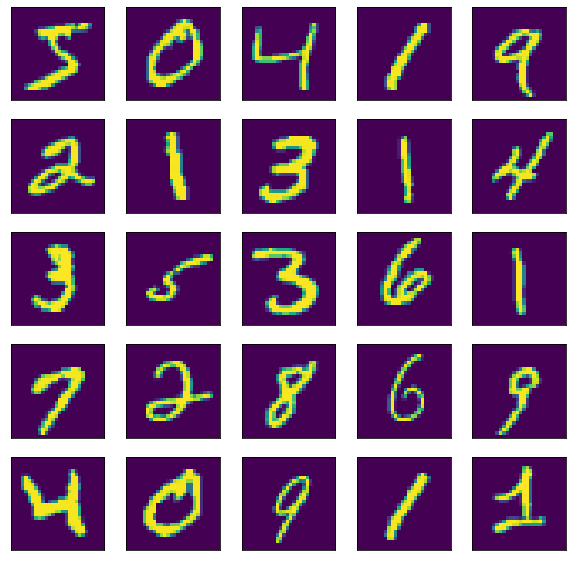

In [27]:
#Verify the data. Going to plot first 25 images

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels are in arrays
    # Why you need extra index
plt.show()

In [21]:
#CNN takes tensors of shape (image_height, image_width, colour_channels ( R G B))
#CNN here will process inputs of shape (28, 28, 3).
#As MNIST are 28x28
#Can do this by paassing the arugment input_shape to your first layer


model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), activation = 'relu', input_shape= (input_shape)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))

#Display Architecture of model 
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 3, 3, 64)          36928     
Total params: 56,256
Trainable params: 56,256
Non-trainable params: 0
_________________________________________________________________


In [22]:
#Will now feed the final layer of shape (4, 4, 64) into one or more dense layers to peform classifcation
#Dense layers take vectors as input (which are 1D)
#Therefore need to flatten the 3D output to 1D

model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
#10 output classes therefore Dense layer with 10 Outputs
model.add(layers.Dense(10))

model.summary()

#Network shows that (4, 4, 64) outputs were flattened into vectors of shape (1024) before going through two Dense layers

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_3 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)               

In [23]:
#Compile and train the model 

model.compile(optimizer="adam",
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics =["accuracy"])

history = model.fit(train_images, train_labels, epochs = 3,
                   validation_data = (test_images, test_labels))

Epoch 1/3
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1519 - accuracy: 0.9535 - val_loss: 0.0524 - val_accuracy: 0.9830
Epoch 2/3
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0490 - accuracy: 0.9842 - val_loss: 0.0283 - val_accuracy: 0.9912
Epoch 3/3
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0348 - accuracy: 0.9890 - val_loss: 0.0304 - val_accuracy: 0.9907


313/313 - 1s - loss: 0.0304 - accuracy: 0.9907


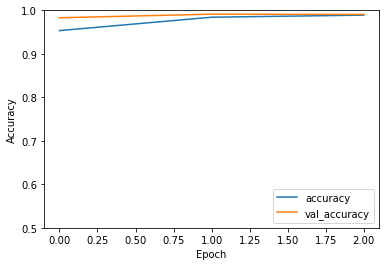

In [24]:

#Evalauate the model

plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label = "val_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim([0.5, 1])
plt.legend(loc="lower right")

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)
